# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


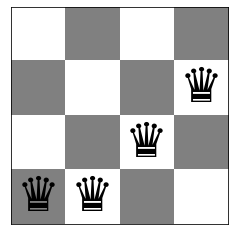

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [130]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


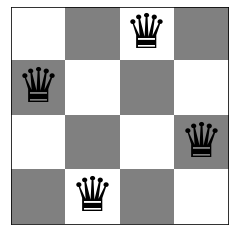

In [131]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

#

## Logic of the implementation
For the implementation of task 1 (and every other implementation) I assumed that a local search meant that the Queen can only move, adjacently, up or down within its own column. This meant that the Queen can't move from square 0 to square n-1 by moving up and "teleporting" to the bottom of the board.

This implementation works by examining a board and recording the conflicts with all possible boards formed using local search of the Queens that I explained above. Once there is one board that has fewer conflicts than the current board being used then that board becomes the board that will be the "new" board that is hill-climbed to. However, if another board comes that has fewer conflicts than the current least conflict board that that board will be replaced with the new lowest conflicting board. This continues until all the local searches have been exhausted and this process is repeated with the new lowest conflicting board. That process constitutes until a board is found that has 0 conflicts or no board is found that has lower conflicts than the current board.

This implementation is strong in making sure to check every possible outcome in order to creat the shortest path between the starting board and the local optima. What it lack is the time and space it takes up in order to get to the local optima.

In [157]:
changed = False
def highest_possible_successor(steep_board, n, verbose):
    global changed
    changed = False
    temp = steep_board.copy()
    temp_best = steep_board.copy()
    for x in range(n):
        if verbose: print(f"----------{x}----------")
        if temp[x] != 0: # If the Queen isn't at the top of the board, Check the conflicts if the queen is moved up
            temp[x] -= 1
            if verbose: print(f"{conflicts(temp)} vs. {conflicts(temp_best)}")
            if conflicts(temp) < conflicts(temp_best): # If there are fewer conflicts with the new board, make it the current best
                changed = True
                temp_best = temp.copy()
            temp[x] += 1

        if temp[x] != n-1: # If the Queen isn't at the bottom of the board, Check the conflicts if the queen is moved down
            temp[x] += 1
            if verbose: print(f"{conflicts(temp)} vs. {conflicts(temp_best)}")
            if conflicts(temp) < conflicts(temp_best): # If there are fewer conflicts with the new board, make it the current best
                changed = True
                temp_best = temp.copy()
            temp[x] -= 1

    if verbose: print(f"Changed: {changed}")
    if changed:
        steep_board = temp_best.copy()
    return steep_board

def steepest_ascend(board1, verbose = False):
    global changed
    n = len(board1)
    steep_board = board1
    better = True
    step = 1
    if verbose: print("--------------------Start Board--------------------")
    if verbose: show_board(steep_board)

    while better:
        if verbose: print(f"---------------Step: {step}---------------")
        changed = False
        steep_board = highest_possible_successor(steep_board, n, verbose)
        if not changed or conflicts(steep_board) == 0: # If the board wasn't changed or if the board has 0 conflicts return the board
            if verbose: print("Final Board")
            conflicts_num = conflicts(steep_board)
            if verbose: show_board(steep_board)
            return conflicts_num

        if verbose: print("Changed Board")
        if verbose: show_board(steep_board)
        step += 1

    return print("Done")


steepest_ascend(random_board(50))

28

In [172]:
## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.
#

##Logic of the implementation
This implementation was the same as the implementation above, with a few tweaks. In order to choose a random local search that would lower the number of conflicts, I kept track of all the boards that had fewer conflicts than the current board, and I stored then in an array. Once all the searches were exhausted, I randomly chose one of the boards to use as the next current board.

SyntaxError: invalid syntax (<ipython-input-172-1127c7f9ad3f>, line 3)

In [168]:
import random
possible_successors = []
def possible_successor(steep_board, n, verbose):
    global changed
    changed = False
    possible_successors.clear()
    temp = steep_board.copy()
    for x in range(n):
        if verbose: print(f"----------{x}----------")
        if temp[x] != 0:
            temp[x] -= 1
            if verbose: print(f"{conflicts(temp)} vs. {conflicts(steep_board)}")
            if conflicts(temp) < conflicts(steep_board):
                changed = True
                possible_successors.append(temp.copy())
            temp[x] += 1

        if temp[x] != n-1:
            temp[x] += 1
            if verbose: print(f"{conflicts(temp)} vs. {conflicts(steep_board)}")
            if conflicts(temp) < conflicts(steep_board):
                changed = True
                possible_successors.append(temp.copy())
            temp[x] -= 1

    if verbose: print(f"Changed: {changed}")
    if changed:
        if verbose: print(possible_successors)
        steep_board = random.choice(possible_successors)
    return steep_board

def stochastic_hill_climbing_1(board2, verbose = False):
    global changed
    n = len(board2)
    steep_board = board2
    if verbose: print("--------------------Start Board--------------------")
    if verbose: show_board(steep_board)
    better = True
    step = 1

    while better:
        if verbose: print(f"---------------Step: {step}---------------")
        changed = False
        steep_board = possible_successor(steep_board, n, verbose)
        if not changed or conflicts(steep_board) == 0:
            if verbose: print("Final Board")
            if verbose: show_board(steep_board)
            return conflicts(steep_board)
        if verbose: print("Changed Board")
        if verbose: show_board(steep_board)
        step += 1

    return print("Best Found")



stochastic_hill_climbing_1(random_board(10))

6

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

##Logic of the implementation
This implementation was the same as the first implementation, with a few tweaks. In order to choose a random local search, I decided to keep track of all the possible local searches in an array. I did this by making an array of tuples with the first value being the column number and the second value being 0 for down and 1 for up. This algorithm ended up being the fastest by a lot, and it wasn't even close. This is because it takes the first board that has fewer conflicts and doesn't look at the others possible searches. The issue with this search algorithm is that, unlike Steepest-ascend Hill Climbing Search, it does not know if it chose the best possible search algorithm to get it to the lowest possible conflicts for the search of the current board.

In [138]:
import random
def random_move(steep_board, n, verbose):
    global changed
    changed = False
    check_num = 1
    possible_moves = []
    possible_moves.clear()
    temp = steep_board.copy()
    for x in range(n):
        up = (x,0)
        down = (x,1)
        possible_moves.append(up)
        possible_moves.append(down)

    if verbose: print(possible_moves)
    while changed == False and len(possible_moves) != 0:
        if verbose: print(f"----------{check_num}----------")
        if verbose: print(f"possible_moves: {len(possible_moves)}")
        temp_tup = random.choice(possible_moves)
        if verbose: print(temp_tup)
        possible_moves.remove(temp_tup)
        if verbose: print(possible_moves)
        if temp_tup[1] == 0:
            if temp[temp_tup[0]] != 0:
                temp[temp_tup[0]] -= 1
                # print("Move up")
                # show_board(temp)
                # print("here11")
                if verbose: print(f"{conflicts(temp)} vs. {conflicts(steep_board)}")
                if conflicts(temp) < conflicts(steep_board):
                    # print("here1")
                    # print(f"In if {conflicts(temp)} vs.{conflicts(steep_board)}")
                    changed = True
                    if verbose: print(f"Changed: {changed}")
                    return temp.copy()
                    # print(f"Temp after move up: {temp}")
                    # show_board(temp)
                temp[temp_tup[0]] += 1
                # print(f"Temp after move BACK: {temp}")
                # show_board(temp)
                # print("Back to normal")
                # show_board(temp)
        if temp_tup[1] == 1:
            if temp[temp_tup[0]] != n-1:
                temp[temp_tup[0]] += 1
                # print("Move down")
                # show_board(temp)
                if verbose: print(f"{conflicts(temp)} vs. {conflicts(steep_board)}")
                if conflicts(temp) < conflicts(steep_board):
                    # print("here2")
                    # print(f"In if{conflicts(temp)} vs.{conflicts(steep_board)}")
                    changed = True
                    if verbose: print(f"Changed: {changed}")
                    return temp.copy()
                    # print(f"Temp after move down: {temp}")
                    # show_board(temp)
                temp[temp_tup[0]] -= 1
        check_num += 1
                # print(f"Temp after move BACK: {temp}")
                # show_board(temp)

    return steep_board

def first_choice_hill_climbing(board3, verbose = False):
    global changed
    n = len(board3)
    steep_board = board3
    if verbose: print("--------------------Start Board--------------------")
    if verbose: show_board(steep_board)
    current_board = steep_board
    better = True
    step = 1

    while better:
        if verbose: print(f"---------------Step: {step}---------------")
        changed = False
        steep_board = random_move(steep_board, n, verbose)
        if not changed or conflicts(steep_board) == 0:
            if verbose: print("Final Board")
            if verbose: show_board(steep_board)
            return conflicts(steep_board)
        if verbose: print("Changed Board")
        if verbose: show_board(steep_board)
        step += 1

    return print("Best Found")


first_choice_hill_climbing(random_board(4))

4

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

In [134]:
print("--------------------Where n = 5 --------------------")
attempt = 1
for x in range(100):
    test_board = random_board(5)
    steepest = int(steepest_ascend(test_board))
    random_test = int(stochastic_hill_climbing_1(test_board))
    first = int(first_choice_hill_climbing(test_board))
    print(f"Attempt: {attempt}\nSteepest: {steepest} Random: {random_test} First: {first}\n")
    total =  steepest + random_test + first
    if total == 0:
        attempt = 0
        break
    attempt += 1

print("--------------------Where n = 6 --------------------")
attempt = 1
for x in range(100):
    test_board = random_board(6)
    steepest = int(steepest_ascend(test_board))
    random_test = int(stochastic_hill_climbing_1(test_board))
    first = int(first_choice_hill_climbing(test_board))
    print(f"Attempt: {attempt}\nSteepest: {steepest} Random: {random_test} First: {first}\n")
    total =  steepest + random_test + first
    if total == 0:
        attempt = 0
        break
    attempt += 1

print("--------------------Where n = 7 --------------------")
attempt = 1
for x in range(100):
    test_board = random_board(7)
    steepest = int(steepest_ascend(test_board))
    random_test = int(stochastic_hill_climbing_1(test_board))
    first = int(first_choice_hill_climbing(test_board))
    print(f"Attempt: {attempt}\nSteepest: {steepest} Random: {random_test} First: {first}\n")
    total =  steepest + random_test + first
    if total == 0:
        attempt = 0
        break
    attempt += 1

print("--------------------Where n = 8 --------------------")
attempt = 1
for x in range(100):
    test_board = random_board(8)
    steepest = int(steepest_ascend(test_board))
    random_test = int(stochastic_hill_climbing_1(test_board))
    first = int(first_choice_hill_climbing(test_board))
    print(f"Attempt: {attempt}\nSteepest: {steepest} Random: {random_test} First: {first}\n")
    total =  steepest + random_test + first
    if total == 0:
        attempt = 0
        break
    attempt += 1

print("--------------------Where n = 9 --------------------")
attempt = 1
for x in range(100):
    test_board = random_board(9)
    steepest = int(steepest_ascend(test_board))
    random_test = int(stochastic_hill_climbing_1(test_board))
    first = int(first_choice_hill_climbing(test_board))
    print(f"Attempt: {attempt}\nSteepest: {steepest} Random: {random_test} First: {first}\n")
    total =  steepest + random_test + first
    if total == 0:
        attempt = 0
        break
    attempt += 1



--------------------Where n = 5 --------------------
Attempt: 1
Steepest: 0 Random: 1 First: 2

Attempt: 2
Steepest: 1 Random: 1 First: 1

Attempt: 3
Steepest: 0 Random: 0 First: 0

--------------------Where n = 6 --------------------
Attempt: 1
Steepest: 4 Random: 2 First: 1

Attempt: 2
Steepest: 3 Random: 2 First: 3

Attempt: 3
Steepest: 3 Random: 2 First: 2

Attempt: 4
Steepest: 2 Random: 3 First: 2

Attempt: 5
Steepest: 2 Random: 4 First: 3

Attempt: 6
Steepest: 1 Random: 3 First: 2

Attempt: 7
Steepest: 3 Random: 1 First: 3

Attempt: 8
Steepest: 1 Random: 2 First: 1

Attempt: 9
Steepest: 2 Random: 3 First: 2

Attempt: 10
Steepest: 2 Random: 2 First: 3

Attempt: 11
Steepest: 4 Random: 4 First: 2

Attempt: 12
Steepest: 1 Random: 3 First: 3

Attempt: 13
Steepest: 3 Random: 3 First: 3

Attempt: 14
Steepest: 3 Random: 4 First: 2

Attempt: 15
Steepest: 2 Random: 2 First: 2

Attempt: 16
Steepest: 2 Random: 2 First: 2

Attempt: 17
Steepest: 1 Random: 2 First: 1

Attempt: 18
Steepest: 3 Ra

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

## Running Tests

For my objective function value I decided to take the output of the number of conflicts on the return board and find the average for the different algorithms for different values of N. Then I did my time tests on the cell below.

In [147]:
import timeit

print("--------------------Where n = 5 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(5)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(5)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(5)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

print("--------------------Where n = 10 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(10)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(10)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(10)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

print("--------------------Where n = 20 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(20)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(20)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(20)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

print("--------------------Where n = 50 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(50)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(50)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(50)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

print("--------------------Where n = 75 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(75)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(75)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(75)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

print("--------------------Where n = 100 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(100)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(100)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(1):
    test_board = random_board(100)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/1 * 1e3} milliseconds")

# Finding upper limits
print("--------------------Where n = 200 --------------------")
start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(200)
    steepest_ascend(test_board)
end_time = timeit.default_timer()
print(f"Steepest took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(10):
    test_board = random_board(200)
    stochastic_hill_climbing_1(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 1 took on average: {(end_time-start_time)/10 * 1e3} milliseconds")

start_time = timeit.default_timer()
for x in range(1):
    test_board = random_board(200)
    first_choice_hill_climbing(test_board)
end_time = timeit.default_timer()
print(f"Stochastic Hill Climb 2 took on average: {(end_time-start_time)/1 * 1e3} milliseconds")


--------------------Where n = 5 --------------------
Steepest took on average: 0.7563100000879786 milliseconds
Stochastic Hill Climb 1 took on average: 0.7429100000081235 milliseconds
Stochastic Hill Climb 2 took on average: 0.40965999996842584 milliseconds
--------------------Where n = 10 --------------------
Steepest took on average: 2.6758799999697658 milliseconds
Stochastic Hill Climb 1 took on average: 2.7758799999901385 milliseconds
Stochastic Hill Climb 2 took on average: 1.4987000000473927 milliseconds
--------------------Where n = 20 --------------------
Steepest took on average: 15.050599999995029 milliseconds
Stochastic Hill Climb 1 took on average: 23.598559999936697 milliseconds
Stochastic Hill Climb 2 took on average: 5.02784000000247 milliseconds
--------------------Where n = 50 --------------------
Steepest took on average: 243.19262000008166 milliseconds
Stochastic Hill Climb 1 took on average: 287.5084700000116 milliseconds
Stochastic Hill Climb 2 took on average: 42.

In [ ]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [ ]:
# Code and description go here